© 版权所有 Wenting Tu

In [8]:
import warnings 
warnings.filterwarnings("ignore") 

# <b><span style='color:#F1C40F'>|</span> 不同支持向量机的实现</b>


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier

from sklearn.preprocessing import StandardScaler

In [10]:
iris = datasets.load_iris()

X = iris.data[:, :2]              
y = iris.target

for i in range(len(y)):
    if (y[i]==2):
        y[i] = 1

svc = SVC(kernel='linear').fit(X, y)
lin_svc = LinearSVC(loss = 'hinge').fit(X, y)
sgd = SGDClassifier(loss="hinge").fit(X, y)


In [4]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

h = .02 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

titles = ['SVC ',
          'LinearSVC ',        
          'SGDClassifier']

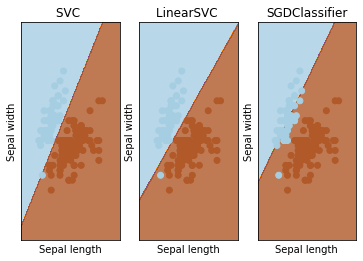

In [5]:
for i, clf in enumerate((svc, lin_svc, sgd)):

    plt.subplot(1, 3, i + 1)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()

